***Discrete Time Control and z-Transform***

The aim of my part of the notebook about "Problem Set 5" is to show to the students that choosing one of the three z-transforms that they have learned, will actually make a difference in performance of their discrete time controller.

In the beginning, I try to get to know the control library and first plot some descrete-time systems with different approximations.

# Installation

Set up programming environment by installing necessary libraries with pip.

In [97]:
!pip install control

# Python Packages

In [98]:
# Import the required python libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy import signal

# Choose a System to Control

Select or create a simple continuous-time system that you want to control. It could be a first-order system or a second-order system. Define its transfer funciton.

In [99]:
# Example: first-order system H(s) = 1 / (s + 1)
numerator1 = [1]
denominator1 = [1, 1]

# Example: second-order system G(s) = (s + 1) / (3s^2 + 2s + 1)
numerator2 = [1, 1]
denominator2 = [3, 2, 1]


#system = ct.TransferFunction(numerator1, denominator1)
system = ct.TransferFunction(numerator2, denominator2)

# Implement Different Z-Transform Approximations

Define functions for Euler forward, Euler backwards, and Tustin approximations.

In [100]:
#'ct.sample_system' is used to descretize a continuous-time system
def euler_forward(system):
  return ct.sample_system(system, 0.1, method='foh') #'system' defines the system you want to descretize; '1.0' is again the sampling time

def euler_backward(system):
  return ct.sample_system(system, 0.1, method='bilinear', alpha=1.0) #'method' specifies the type of discretization

def tustin_approximation(system):
  return ct.sample_system(system, 0.1, method='bilinear', alpha=0.5) #The 'alpha' parameter adjusts the mapping of frequencies from the continuous-time domain to the discrete-time domain

# Simulate and Plot Responses

Here you can see the different z-approximations to the same continuous-time system.

ValueError: x and y must have same first dimension, but have shapes (100,) and (2, 100)

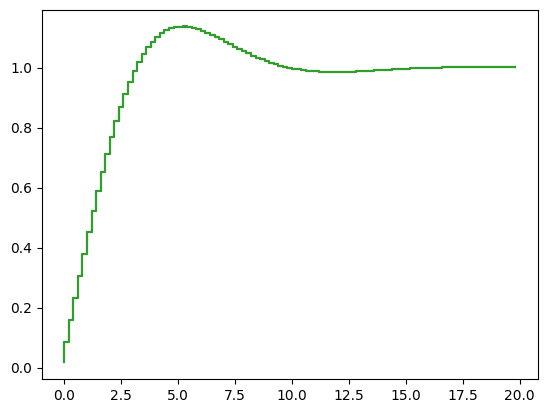

In [101]:
# Time vector
time = np.arange(0, 20, 0.2)

# Simulate responses using z-transform approximations
response_forward = ct.step_response(euler_forward(system), time)
response_backward = ct.step_response(euler_backward(system), time)
response_tustin = ct.step_response(tustin_approximation(system), time)
time_continuous, response_continuous = ct.step_response(system)


# Plot responses
plt.step(time, response_forward[1], label='Euler Forward')
plt.step(time, response_backward[1], label='Euler Backward')
plt.step(time, response_tustin[1], label='Tustin Approximation')
plt.plot(time_continuous, response_continous,label='Continous')

plt.xlabel('Time')
plt.ylabel('System Response')
plt.legend()
plt.show()